In [1]:
import TurbPy as tb
from TurbPy.imports import *

deck = 'KH_200ppc_200wci/'

dirs = '/pscratch/sd/g/goodwill/' + deck

figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)

en_out = tb.read_energies(dirs) /(info['Lx/de'] * info['Ly/de'] * info['Lz/de'])
twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

Lx_di = np.linspace(0, lx, nx)
Ly_di = np.linspace(0, ly, ny)

In [2]:
print(len(times))

1125


In [3]:
t = 1124
ds = tb.load_hydro_fil(dirs, times[t], species = 'ion')

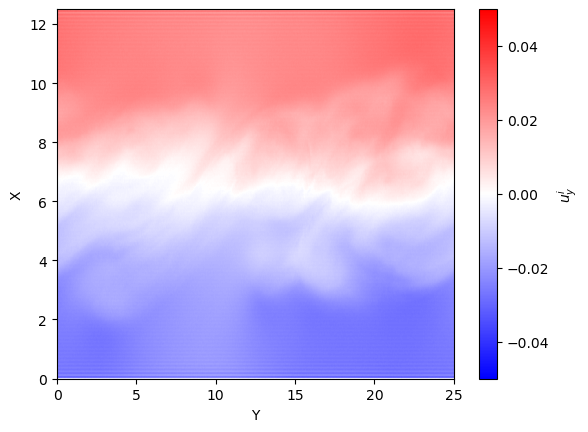

In [4]:
ux = ds['jx']/ds['rho']
uy = ds['jy']/ds['rho']
uz = ds['jz']/ds['rho']

# u = np.sqrt(ux**2 + uy**2 + uz**2)

plt.pcolormesh(Ly_di, Lx_di, uy, cmap = 'bwr')
plt.clim(-0.05,0.05)
plt.colorbar(label = r'$u_y^i$')
plt.xlabel('Y')
plt.ylabel('X')
plt.savefig(figs + 'uyi.png')

In [5]:
t2 = 507
el = tb.load_hydro_fil(dirs, times[t], species = 'electron')
ion = tb.load_hydro_fil(dirs, times[t], species = 'ion')

f = tb.load_field_fil(dirs, times[t])

In [6]:
j = (el['jx'] + ion['jx'])**2  + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2

In [7]:
def time_av(t, num = 5):
  # pthe_t, pide_t = tb.ps_calc(dirs, times[t], 'electron')
  # el = tb.load_hydro_fil(dirs, times[t], 'electron')
  # ion = tb.load_hydro_fil(dirs, times[t], 'ion')
  # j_t = np.sqrt((el['jx'] + ion['jx'])**2  + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2)
  # wex, wey, wez = tb.w_calc(dirs, t, 'electron')
  # we_t = np.sqrt(wex**2 + wey**2 + wez**2)
  # sh = np.zeros((int(info['nx']), int(info['ny'])))
  # pthe = sh
  # pide = sh
  # pthi = sh
  # pidi = sh
  # JiE = sh
  # JeE = sh
  # JE = sh
  # j = sh
  # we = sh
  el = tb.load_hydro_fil(dirs, 0, 'electron')
  ion = tb.load_hydro_fil(dirs, 0, 'ion')
  pthe_t, pide_t = tb.ps_calc(dirs, 0, 'electron')
  pthi_t, pidi_t = tb.ps_calc(dirs, 0, 'ion')
  pthe = np.zeros(pthe_t.shape)
  pide = np.zeros(pide_t.shape)
  # pthi_t, pidi_t = tb.ps_calc(dirs, times[t], 'ion')
  pthi = np.zeros(pthi_t.shape)
  pidi = np.zeros(pidi_t.shape)
  JiE_t, JeE_t, JE_t = tb.JE_calc(dirs, times[t])
  JiE = np.zeros(JE_t.shape)
  JeE = np.zeros(JE_t.shape)
  JE = np.zeros(JE_t.shape)
  j = np.zeros(el['jx'].shape)
  we = np.zeros((1080,2560))
   
  for i in np.arange(int(-(num/2)), int(num/2)+1):
    el = tb.load_hydro_fil(dirs, times[t + i], 'electron')
    ion = tb.load_hydro_fil(dirs, times[t + i], 'ion')
    j_t = (el['jx'] + ion['jx'])**2  + (el['jy'] + ion['jy'])**2 + (el['jz'] + ion['jz'])**2
    wex, wey, wez = tb.w_calc(dirs, t, 'electron')
    we_t = np.sqrt(wex**2 + wey**2 + wez**2)
    pthe_t, pide_t = tb.ps_calc(dirs, times[t + i], 'electron')
    pthi_t, pidi_t = tb.ps_calc(dirs, times[t + i], 'ion')
    pthe = pthe + pthe_t
    pthi = pthi + pthi_t
    pide = pide + pide_t
    pidi = pidi + pidi_t
    JiE_t, JeE_t, JE_t = tb.JE_calc(dirs, times[t + i])
    JiE = JiE + JiE_t
    JeE = JeE + JeE_t
    JE = JE + JE_t
    j = j + j_t
    we = we + we_t
  we = we/num
  j = j/num
  JE = JE/num
  pthe = pthe/num
  pide = pide/num
  pthi = pthi/num
  pidi = pidi/num

  return j, JE, pthe, pide, pthi

In [8]:
j, JE, pthe, pide, pthi = time_av(507)

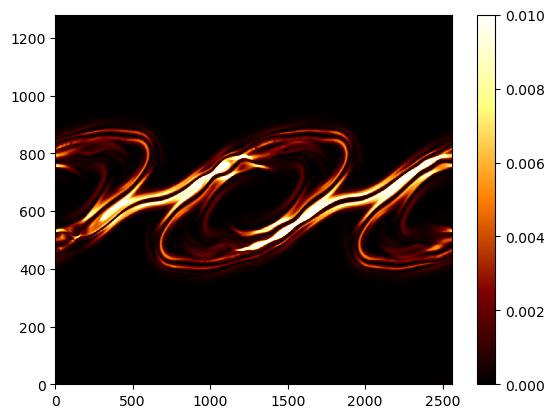

In [9]:
plt.pcolormesh(j, cmap = 'afmhot')
plt.colorbar()
plt.clim(0, 1e-2)

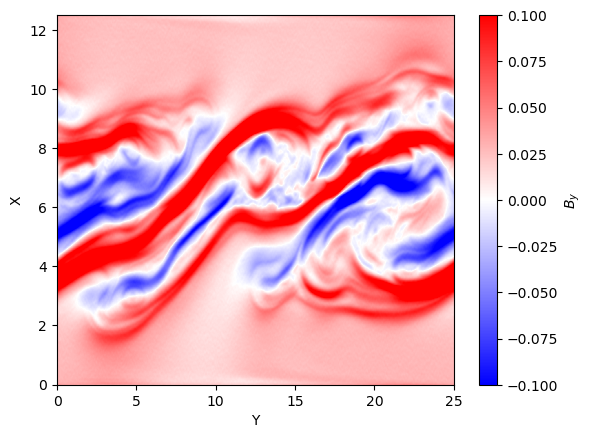

In [10]:
plt.pcolormesh(Ly_di, Lx_di, f['cby'], cmap = 'bwr')
plt.colorbar(label = '$B_y$')
plt.clim(-1e-1, 1e-1)

plt.xlabel('Y')
plt.ylabel('X')
plt.savefig(figs + 'by_II.png')

In [11]:
f0 = tb.load_field_fil(dirs, times[0])

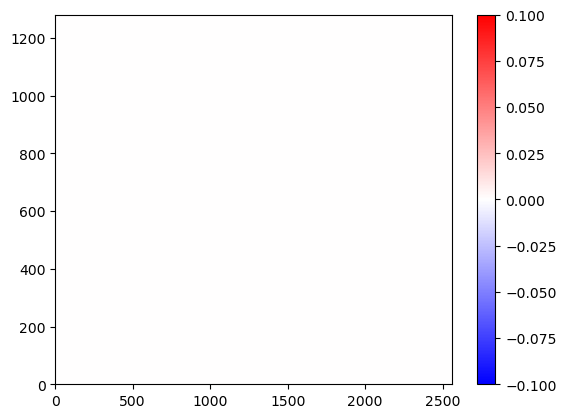

In [12]:
plt.pcolormesh(f0['cbx'], cmap = 'bwr')
plt.colorbar()
plt.clim(-1e-1, 1e-1)

In [16]:
len(times)

1125

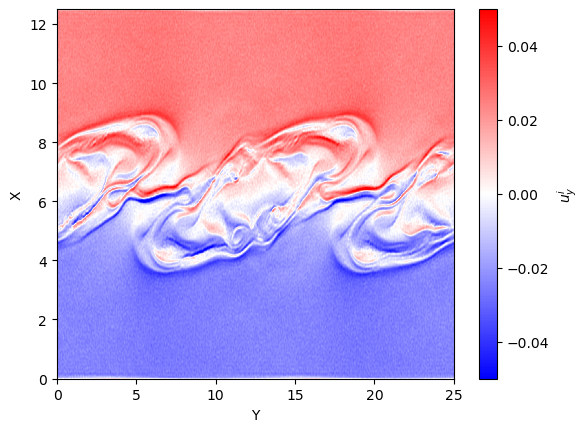

In [42]:
t2 = 530
el = tb.load_hydro_fil(dirs, times[t2], species = 'electron')
ion = tb.load_hydro_fil(dirs, times[t2], species = 'ion')

uxe = el['jx']/el['rho']
uxi = ion['jx']/ion['rho']

uye = el['jy']/el['rho']
uyi = ion['jy']/ion['rho']

# u = np.sqrt(ux**2 + uy**2 + uz**2)

plt.pcolormesh(Ly_di, Lx_di, uye, cmap = 'bwr')
plt.clim(-0.05,0.05)
plt.colorbar(label = r'$u_y^i$')
plt.xlabel('Y')
plt.ylabel('X')
plt.savefig(figs + 'uyi.png')

In [44]:
twci[530]

73.19660400000002

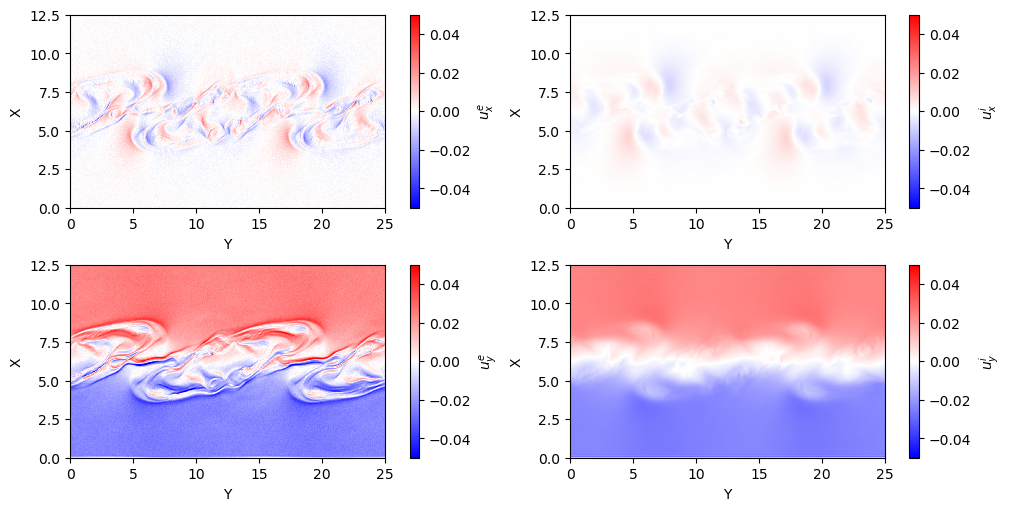

In [43]:
fig, ax = plt.subplots(2,2, figsize = (10,5), layout = 'constrained')


cm0 = ax[0,0].pcolormesh(Ly_di, Lx_di, uxe, cmap = 'bwr')
cm0.set_clim(-0.05,0.05)
# cm0.colorbar(label = r'$u_y^i$')
ax[0,0].set_xlabel('Y')
ax[0,0].set_ylabel('X')

cm1 = ax[0,1].pcolormesh(Ly_di, Lx_di, uxi, cmap = 'bwr')
cm1.set_clim(-0.05,0.05)
# cm0.colorbar(label = r'$u_y^i$')
ax[0,1].set_xlabel('Y')
ax[0,1].set_ylabel('X')

cm2 = ax[1,0].pcolormesh(Ly_di, Lx_di, uye, cmap = 'bwr')
cm2.set_clim(-0.05,0.05)
# cm0.colorbar(label = r'$u_y^i$')
ax[1,0].set_xlabel('Y')
ax[1,0].set_ylabel('X')

cm3 = ax[1,1].pcolormesh(Ly_di, Lx_di, uyi, cmap = 'bwr')
cm3.set_clim(-0.05,0.05)
# cm0.colorbar(label = r'$u_y^i$')
ax[1,1].set_xlabel('Y')
ax[1,1].set_ylabel('X')



cb0 = fig.colorbar(cm0 , ax = ax[0,0], label = r'$u_x^e$')
cb1 = fig.colorbar(cm1 , ax = ax[0,1], label = r'$u_x^i$')
cb2 = fig.colorbar(cm2 , ax = ax[1,0], label = r'$u_y^e$')
cb3 = fig.colorbar(cm3 , ax = ax[1,1], label = r'$u_y^i$')

fig.savefig('u_xy.png')
